## 모델평가_연습

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score

In [2]:
ds_hmeq = pd.read_csv("./실습파일/HMEQ.csv", engine = 'python')
ds_hmeq.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [3]:
ds_hmeq["JOB"].fillna("Other",inplace = True)
ds_hmeq.fillna(ds_hmeq.mean(),inplace=True)

In [4]:
# get_dummies: 데이터의 문자형 컬럼에 대한 더미변수 생성
ds_hmeq_dummy = pd.get_dummies(ds_hmeq)
# 더미변수 생성된 데이터의 상위 5개 row를 확인
ds_hmeq_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [5]:
np.random.seed(seed = 1234)
# 0.7(70%)보다 작으면 True -> train 데이터, 아니면 False -> test데이터
msk = np.random.rand(ds_hmeq_dummy.shape[0]) < 0.7
ds_hmeq_train = ds_hmeq_dummy[msk]
# print(msk) 확인용
ds_hmeq_test = ds_hmeq_dummy[~msk]
# train/test 데이터의 목표변수 설명변수 지정
ds_hmeq_train_y = ds_hmeq_train["BAD"]
ds_hmeq_train_x = ds_hmeq_train.drop("BAD", axis = 1, inplace = False)
ds_hmeq_test_y = ds_hmeq_test["BAD"]
ds_hmeq_test_x = ds_hmeq_test.drop("BAD", axis = 1, inplace = False)
# train 데이터와 test 데이터의 크기
print("train data X size: {}".format(ds_hmeq_train_x.shape))
print("train data Y size: {}".format(ds_hmeq_train_y.shape))
print("test data X size: {}".format(ds_hmeq_test_x.shape))
print("test data Y size: {}".format(ds_hmeq_test_y.shape))

train data X size: (2604, 18)
train data Y size: (2604,)
test data X size: (1144, 18)
test data Y size: (1144,)


In [6]:
# train 데이터셋 스케일 조정
ds_hmeq_train_x_scaled = scale(ds_hmeq_train_x, axis=0)
# test 데이터셋 스케일 조정
ds_hmeq_test_x_scaled = scale(ds_hmeq_test_x, axis=0)
# 스케일이 변경된 X변수 확인
pd.DataFrame(ds_hmeq_train_x_scaled,columns=ds_hmeq_train_x.columns).head()

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.


,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-1.546445,-0.994709,-1.227453,-0.020546,-0.26517,-0.337599,-0.962571,-0.019984,-1.424138,0.372555,-1.566391,1.566391,-0.374973,-0.446595,1.217524,-0.587402,-0.135576,-0.184808
1,-1.537818,-1.040082,-1.177823,0.250021,-0.26517,-0.337599,-1.117329,-0.663021,-1.424138,0.344145,-1.566391,1.566391,-0.374973,-0.446595,1.217524,-0.587402,-0.135576,-0.184808
2,-1.494683,0.598052,0.247041,-0.967531,-0.26517,-0.337599,-1.090197,-0.663021,-0.898712,-0.313747,-1.566391,1.566391,-0.374973,2.239164,-0.821339,-0.587402,-0.135576,-0.184808
3,-1.442920,0.633069,0.092557,-1.102815,-0.26517,-0.337599,-1.027931,-0.663021,-0.898712,-0.504711,-1.566391,1.566391,-0.374973,2.239164,-0.821339,-0.587402,-0.135576,-0.184808
4,-1.442920,0.642472,0.242451,-0.967531,-0.26517,-0.337599,-0.961666,-0.663021,-0.898712,-0.521514,-1.566391,1.566391,-0.374973,2.239164,-0.821339,-0.587402,-0.135576,-0.184808


In [7]:
# 분석 모델 리스트
model = ["DecisionTree","RandomForest","GradientBoosting","SVM"]
# 정확도 저장 리스트
train_accuracy = []
test_accuracy = []
#f1 score 저장 리스트
model_f1_score = []

### f1 점수 메소드
### f1_score(test_y,tree.predict(test_x_scaled))
### 모델 평가시 모두 parameter가 같을 필요는 없다.

### -Decision Tree

In [8]:
tree = DecisionTreeClassifier(criterion="gini", max_depth=10, min_samples_leaf=30, random_state=1234)
tree.fit(ds_hmeq_train_x_scaled,ds_hmeq_train_y)
train_accuracy.append(tree.score(ds_hmeq_train_x_scaled,ds_hmeq_train_y))
test_accuracy.append(tree.score(ds_hmeq_test_x_scaled,ds_hmeq_test_y))
# test 데이터로 f1 score 계산
model_f1_score.append(f1_score(ds_hmeq_test_y,tree.predict(ds_hmeq_test_x_scaled)))

### -Random Forest

In [9]:
rf= RandomForestClassifier(criterion="gini", n_estimators = 500, max_depth = 4, min_samples_leaf=30, random_state=1234)
rf.fit(ds_hmeq_train_x_scaled,ds_hmeq_train_y)
train_accuracy.append(rf.score(ds_hmeq_train_x_scaled,ds_hmeq_train_y))
test_accuracy.append(rf.score(ds_hmeq_test_x_scaled,ds_hmeq_test_y))
# test 데이터로 f1 score 계산
model_f1_score.append(f1_score(ds_hmeq_test_y,rf.predict(ds_hmeq_test_x_scaled)))

### -Gradient Boosting

In [10]:
gb = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 4, min_samples_leaf = 30, n_estimators = 5, random_state=1234)
gb.fit(ds_hmeq_train_x_scaled,ds_hmeq_train_y)
train_accuracy.append(gb.score(ds_hmeq_train_x_scaled,ds_hmeq_train_y))
test_accuracy.append(gb.score(ds_hmeq_test_x_scaled,ds_hmeq_test_y))
# test 데이터로 f1 score 계산
model_f1_score.append(f1_score(ds_hmeq_test_y,gb.predict(ds_hmeq_test_x_scaled)))

### -Support Vector Machine
### SVM은 Scale에 영향을 많이 받는다! 그래서 필드에선 이것만 스케일을 하고 분석한다고 하신다.
### 실습상 다 스케일로 맞춰주셨다고 했다.

In [11]:
svm = SVC(C = 6, gamma = 0.1, random_state=1234)
svm.fit(ds_hmeq_train_x_scaled,ds_hmeq_train_y)
train_accuracy.append(svm.score(ds_hmeq_train_x_scaled,ds_hmeq_train_y))
test_accuracy.append(svm.score(ds_hmeq_test_x_scaled,ds_hmeq_test_y))
# test 데이터로 f1 score 계산
model_f1_score.append(f1_score(ds_hmeq_test_y,svm.predict(ds_hmeq_test_x_scaled)))

In [12]:
ds_eval = pd.DataFrame(index=model)
ds_eval["TrainAccuracy"] = train_accuracy
ds_eval["TestAccuracy"] = test_accuracy
ds_eval["F1Score"] = model_f1_score
ds_eval.round(3)

,TrainAccuracy,TestAccuracy,F1Score
DecisionTree,0.929,0.927,0.420
RandomForest,0.925,0.926,0.298
GradientBoosting,0.922,0.922,0.239
SVM,0.981,0.957,0.692


In [13]:
ds_eval.plot.bar(rot = 0)

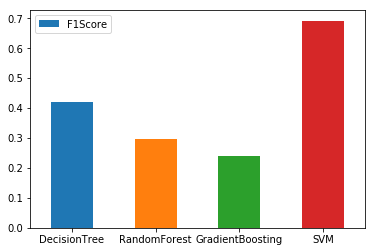

In [14]:
ds_eval.plot.bar(y = "F1Score", rot = 0)

## 모델평가_실습

In [15]:
churn = pd.read_csv("./실습파일/통신고객이탈.csv", engine = "python")
# churn.isnull().sum() 결측치 없음.
churn["CHURN"].replace(to_replace = "Active", value = 0, inplace = True)
churn["CHURN"].replace(to_replace = "Churned", value = 1, inplace = True)

### ID 때문에 ID column 제외하고 더미 만들기

In [16]:
churn_idx = churn.drop("CUSTOMER_ID", axis = 1)
churn_dummy = pd.get_dummies(churn_idx)
churn_dummy.head()

,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,0,31,33.33,6,218,379.8,9,21.6,366,632.4,...,0,0,0,0,0,0,1,0,0,0
1,0,27,30.87,10,373,656.4,11,28.0,411,810.4,...,0,0,0,0,0,0,1,0,0,0
2,0,27,49.40,11,260,582.0,0,0.0,265,614.1,...,0,0,0,0,0,0,1,0,0,0
3,0,61,48.60,1,294,661.8,14,101.5,326,844.0,...,0,0,0,0,0,0,1,0,0,0
4,0,52,56.03,0,221,555.6,7,25.0,274,673.0,...,0,0,0,0,0,0,1,0,0,0


In [17]:
# 이 방법은 train_test_split을 사용해서 간단하게 train 데이터와 test 데이터를 split함. 안전하게 나누기 가능.
from sklearn.model_selection import train_test_split
x = churn_dummy.drop("CHURN", axis = 1, inplace = False)
y = churn_dummy["CHURN"]
churn_train_x, churn_test_x, churn_train_y, churn_test_y = train_test_split(x, y, test_size=0.3, random_state=1234)
# np.random.seed(seed = 1234)
# # 0.7(70%)보다 작으면 True -> train 데이터, 아니면 False -> test데이터
# msk = np.random.rand(churn_dummy.shape[0]) < 0.7
# churn_train = churn_dummy[msk]
# #print(msk)
# churn_test = churn_dummy[~msk]
# # train/test 데이터의 목표변수 설명변수 지정
# churn_train_y = churn_train["CHURN"]
# churn_train_x = churn_train.drop("CHURN", axis = 1, inplace = False)
# churn_test_y = churn_test["CHURN"]
# churn_test_x = churn_test.drop("CHURN", axis = 1, inplace = False)
# # train 데이터와 test 데이터의 크기
print("train data X size: {}".format(churn_train_x.shape))
print("train data Y size: {}".format(churn_train_y.shape))
print("test data X size: {}".format(churn_test_x.shape))
print("test data Y size: {}".format(churn_test_y.shape))

train data X size: (651, 33)
train data Y size: (651,)
test data X size: (279, 33)
test data Y size: (279,)


In [18]:
# train 데이터셋 스케일 조정
churn_train_x_scaled = scale(churn_train_x, axis=0)
# test 데이터셋 스케일 조정
churn_test_x_scaled = scale(churn_test_x, axis=0)
# 스케일이 변경된 X변수 확인
pd.DataFrame(churn_train_x_scaled,columns=churn_train_x.columns).head()

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.


,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,0.659297,0.121772,-0.191707,1.476872,1.496854,-0.518328,0.678178,1.575792,1.532985,0.915960,...,-0.46075,-0.111542,-0.111542,-0.374306,-0.262613,-0.118401,-1.105370,1.788854,-0.390144,-0.039223
1,0.736049,0.786591,2.396339,-0.661815,-0.534734,-0.075671,-0.284308,-0.569331,-0.143503,0.915960,...,-0.46075,-0.111542,-0.111542,-0.374306,-0.262613,-0.118401,0.904674,-0.559017,-0.390144,-0.039223
2,-0.415244,1.480625,-0.766829,1.432593,1.087469,-1.024223,-1.356793,0.979029,0.475336,0.915960,...,-0.46075,-0.111542,-0.111542,-0.374306,-0.262613,-0.118401,-1.105370,1.788854,-0.390144,-0.039223
3,-0.568749,1.178499,-0.191707,0.117500,-0.452149,-0.644802,-0.944298,-0.287078,-0.953914,0.915960,...,-0.46075,-0.111542,-0.111542,2.671610,-0.262613,-0.118401,0.904674,-0.559017,-0.390144,-0.039223
4,0.045274,1.520528,2.108779,-0.431563,-0.870973,-0.771276,1.745163,-0.750780,-0.956148,-1.091751,...,-0.46075,-0.111542,-0.111542,-0.374306,-0.262613,-0.118401,0.904674,-0.559017,-0.390144,-0.039223


In [19]:
# 분석 모델 리스트
model_churn = ["DecisionTree","RandomForest","GradientBoosting","SVM"]
# 정확도 저장 리스트
train_accuracy_churn = []
test_accuracy_churn = []
#f1 score 저장 리스트
model_churn_f1_score = []

### f1 점수 메소드
### f1_score(test_y,tree.predict(test_x_scaled))
### 모델 평가시 모두 parameter가 같을 필요는 없다.

### -Decision Tree

In [20]:
tree = DecisionTreeClassifier(criterion="gini", max_depth=10, min_samples_leaf=30, random_state=1234)
tree.fit(churn_train_x,churn_train_y)
train_accuracy_churn.append(tree.score(churn_train_x,churn_train_y))
test_accuracy_churn.append(tree.score(churn_test_x,churn_test_y))
# test 데이터로 f1 score 계산
model_churn_f1_score.append(f1_score(churn_test_y,tree.predict(churn_test_x)))

### -Random Forest

In [21]:
rf= RandomForestClassifier(criterion="gini", n_estimators = 500, max_depth = 4, min_samples_leaf=30, random_state=1234)
rf.fit(churn_train_x,churn_train_y)
train_accuracy_churn.append(rf.score(churn_train_x,churn_train_y))
test_accuracy_churn.append(rf.score(churn_test_x,churn_test_y))
# test 데이터로 f1 score 계산
model_churn_f1_score.append(f1_score(churn_test_y,rf.predict(churn_test_x)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


### -Gradient Boosting

In [22]:
gb = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 4, min_samples_leaf = 30, n_estimators = 5, random_state=1234)
gb.fit(churn_train_x,churn_train_y)
train_accuracy_churn.append(gb.score(churn_train_x,churn_train_y))
test_accuracy_churn.append(gb.score(churn_test_x,churn_test_y))
# test 데이터로 f1 score 계산
model_churn_f1_score.append(f1_score(churn_test_y,rf.predict(churn_test_x)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


### -Support Vector Machine
### SVM은 Scale에 영향을 많이 받는다! 그래서 필드에선 이것만 스케일을 하고 분석한다고 하신다.
### 실습상 다 스케일로 맞춰주셨다고 했다.

In [23]:
svm = SVC(C = 6, gamma = 0.1, random_state=1234)
svm.fit(churn_train_x_scaled,churn_train_y)
train_accuracy_churn.append(svm.score(churn_train_x_scaled,churn_train_y))
test_accuracy_churn.append(svm.score(churn_test_x_scaled,churn_test_y))
# test 데이터로 f1 score 계산
model_churn_f1_score.append(f1_score(churn_test_y,rf.predict(churn_test_x_scaled)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
churn_eval = pd.DataFrame(index=model_churn)
churn_eval["TrainAccuracy"] = train_accuracy_churn
churn_eval["TestAccuracy"] = test_accuracy_churn
churn_eval["F1Score"] = model_churn_f1_score
churn_eval.round(3)

,TrainAccuracy,TestAccuracy,F1Score
DecisionTree,0.848,0.871,0.5
RandomForest,0.791,0.842,0.0
GradientBoosting,0.791,0.842,0.0
SVM,0.995,0.871,0.0


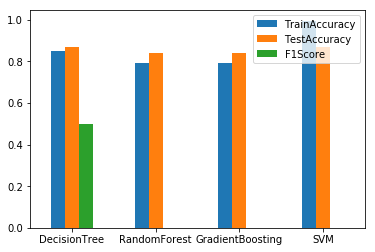

In [25]:
churn_eval.plot.bar(rot = 0)

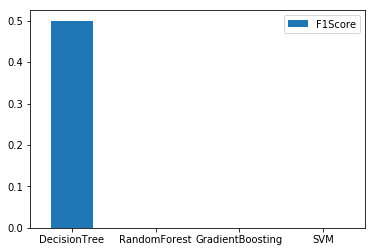

In [26]:
churn_eval.plot.bar(y = "F1Score", rot = 0)